In [49]:
import os
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from skimage import io
import torch
import torchvision
import torchvision.transforms 
from torch import nn
from torch import optim
from torch.nn import functional as nnf
from torch.utils.data import Dataset, DataLoader

In [51]:
def get_class_image(data_dir, c, idx):
    images = [os.path.join(data_dir, str(c), i ) for i in os.listdir(os.path.join(data_dir, str(c)))]
    return io.imread(images[idx], 'L')

# classes = np.random.choice(range(2000), size=900, replace = False)
classes = [17559, 16729, 17026, 16497, 15649]

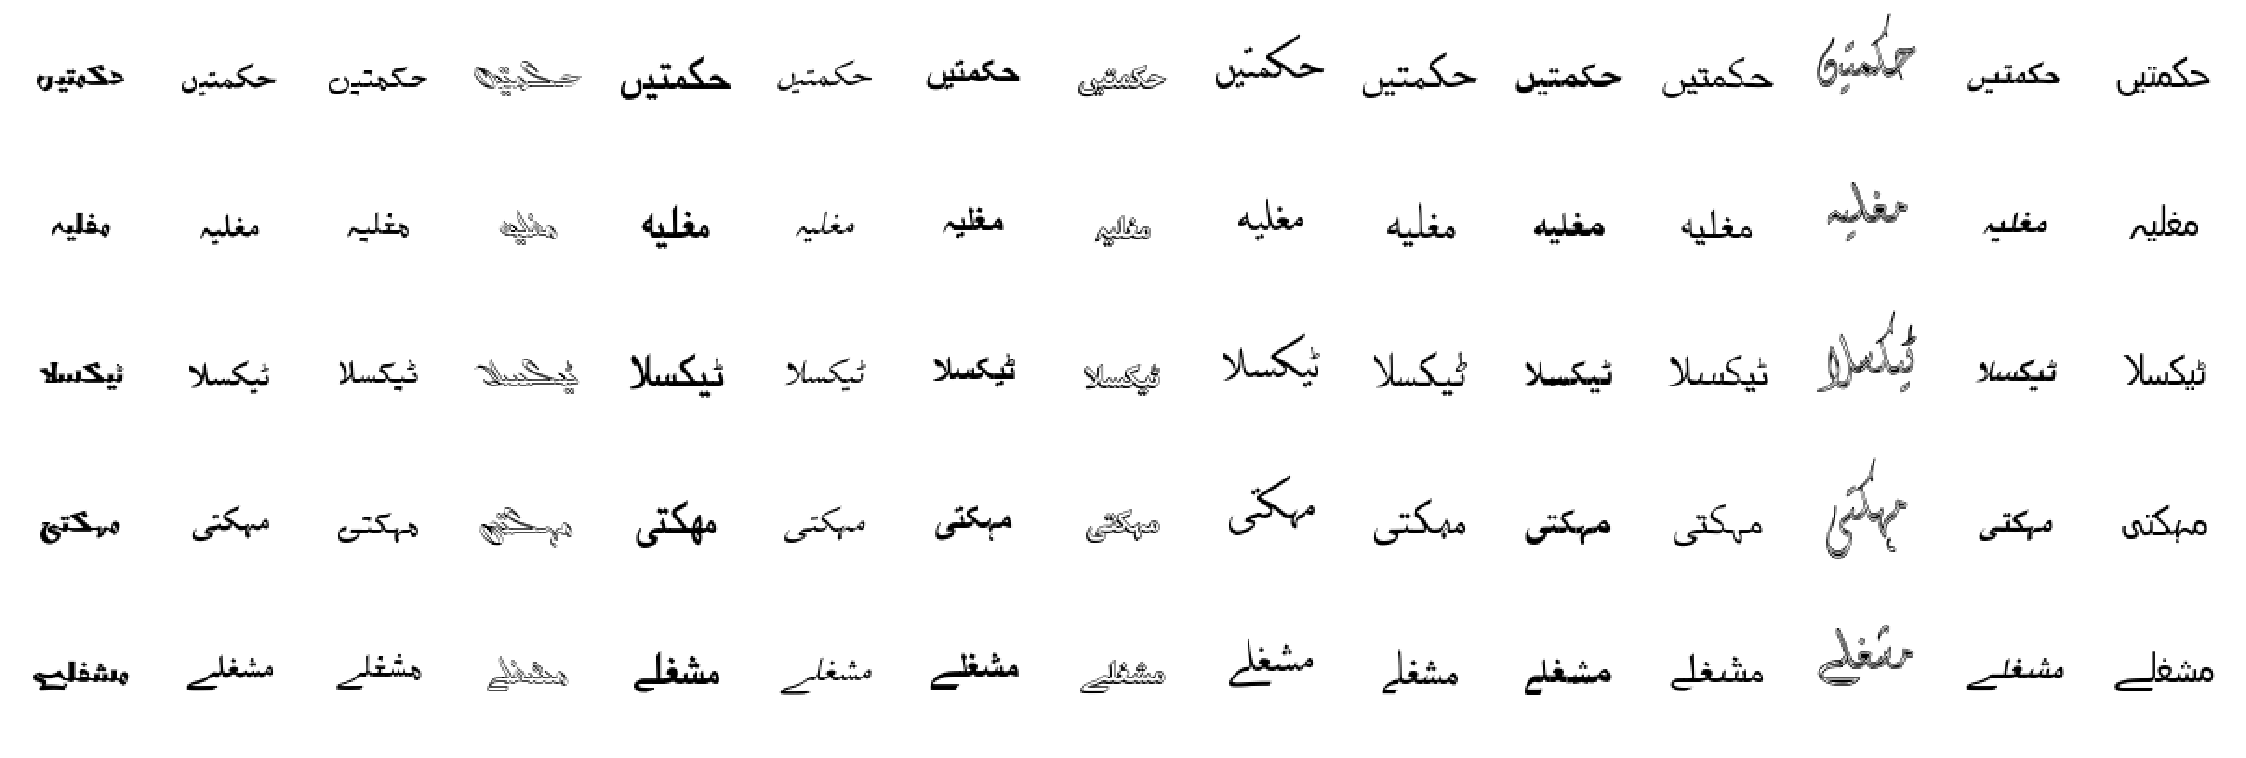

In [52]:
num_cols = 15
num_rows = 5
size = (80,80)

full_image = np.ones((size[0]*num_rows, size[1]*num_cols))
idx = 0

indexes = list(range(200))
np.random.shuffle(indexes)
    
for r in range(num_rows):
    for c in range(num_cols):
        full_image[r*size[0] : (r+1) * size[1], c*size[1] : (c+1) * size[1]] = get_class_image("../../../Datasets/Qaida/images/train/", classes[r], indexes[c])

plt.figure(figsize=(40,20))
plt.imshow(full_image, cmap="gray")
plt.axis("off")
plt.show()

In [48]:
plt.imsave("../doc/img/sprite.png", full_image, cmap="gray")

### Display ligatures

In [14]:
import codecs

import codecs
with codecs.open('../data/ligatures_map', encoding='UTF-16LE') as ligature_file:
    ligatures_map = ligature_file.readlines()

for class_idx in range(len(ligatures_map)):
    ligature = ligatures_map[class_idx]
    print(class_idx, ligature)

0 ﻿ا

1 ر

2 و

3 د

4 ں

5 ن

6 ی

7 س

8 ہ

9 ز

10 آ

11 ت

12 م

13 ل

14 ے

15 ڈ

16 ف

17 ب

18 پ

19 ج

20 ک

21 ذ

22 ح

23 ٹ

24 ڑ

25 ؤ

26 ع

27 ق

28 گ

29 ش

30 ھ

31 چ

32 ض

33 غ

34 ط

35 ص

36 ظ

37 ء

38 خ

39 ث

40 ۃ

41 ژکے

42 گے

43 لے

44 مے

45 نے

46 یے

47 ںے

48 ببے

49 پبے

50 تبے

51 ٹبے

52 ثبے

53 جبے

54 چبے

55 حبے

56 خبے

57 سبے

58 شبے

59 صبے

60 ضبے

61 طبے

62 ظبے

63 عبے

64 غبے

65 فبے

66 قبے

67 کبے

68 گبے

69 لبے

70 مبے

71 نبے

72 ہبے

73 ھبے

74 یبے

75 بپے

76 پپے

77 تپے

78 ٹپے

79 ثپے

80 جپے

81 چپے

82 حپے

83 خپے

84 سپے

85 شپے

86 صپے

87 ضپے

88 طپے

89 ظپے

90 عپے

91 غپے

92 فپے

93 قپے

94 کپے

95 گپے

96 لپے

97 مپے

98 نپے

99 ہپے

100 ھپے

101 یپے

102 بتے

103 پتے

104 تتے

105 ٹتے

106 ثتے

107 جتے

108 چتے

109 حتے

110 ختے

111 ستے

112 شتے

113 صتے

114 ضتے

115 طتے

116 ظتے

117 عتے

118 غتے

119 فتے

120 قتے

121 کتے

122 گتے

123 لتے

124 متے

125 نتے

126 ہتے

127 ھتے

128 یتے

129 بٹے

130 پٹے

131 تٹے

132 ٹٹے



2300 غد

2301 فد

2302 قد

2303 کد

2304 گد

2305 لد

2306 مد

2307 ند

2308 ہد

2309 ئد

2310 ید

2311 بد

2312 پڈ

2313 ٹڈ

2314 جڈ

2315 چڈ

2316 سڈ

2317 گڈ

2318 لڈ

2319 مڈ

2320 نڈ

2321 ہڈ

2322 ئڈ

2323 یڈ

2324 کڈ

2325 تڈ

2326 بڈ

2327 پذ

2328 تذ

2329 جذ

2330 حذ

2331 خذ

2332 شذ

2333 عذ

2334 غذ

2335 فذ

2336 قذ

2337 کذ

2338 لذ

2339 مذ

2340 نذ

2341 ہذ

2342 ئذ

2343 یذ

2344 گذ

2345 بذ

2346 پر

2347 تر

2348 ٹر

2349 ثر

2350 جر

2351 چر

2352 حر

2353 خر

2354 سر

2355 شر

2356 صر

2357 ضر

2358 طر

2359 ظر

2360 عر

2361 غر

2362 فر

2363 قر

2364 کر

2365 گر

2366 لر

2367 مر

2368 نر

2369 ہر

2370 ئر

2371 یر

2372 بر

2373 پڑ

2374 تڑ

2375 جڑ

2376 چڑ

2377 سڑ

2378 غڑ

2379 کڑ

2380 گڑ

2381 لڑ

2382 مڑ

2383 ہڑ

2384 ھڑ

2385 یڑ

2386 نڑ

2387 بڑ

2388 پز

2389 تز

2390 جز

2391 حز

2392 خز

2393 سز

2394 عز

2395 فز

2396 قز

2397 کز

2398 گز

2399 لز

2400 مز

2401 نز

2402 ہز

2403 ئز

2404 یز

2405 ٹز

2406 ٹز

2407 غز

2408 بز

2409 پژ

2410 کژ

2

4689 تہن

4690 ٹپن

4691 ٹسن

4692 ٹفن

4693 ٹیم

4694 ٹھن

4695 ثمن

4696 ثین

4697 جبن

4698 جتن

4699 جگن

4700 جلن

4701 جمن

4702 جین

4703 جھن

4704 چپن

4705 چکن

4706 چمن

4707 چین

4708 چھن

4709 حسن

4710 حصن

4711 حین

4712 ختن

4713 سپن

4714 ستن

4715 سٹن

4716 سجن

4717 سخن

4718 سشن

4719 سقن

4720 سنن

4721 سین

4722 سہن

4723 شکن

4724 شگن

4725 شمن

4726 شین

4727 ضمن

4728 ضین

4729 طعن

4730 طین

4731 عین

4732 غبن

4733 غین

4734 فٹن

4735 فگن

4736 فمن

4737 فین

4738 قطن

4739 قین

4740 کجن

4741 کچن

4742 کشن

4743 کلن

4744 کین

4745 کہن

4746 کھن

4747 گگن

4748 گین

4749 گہن

4750 گھن

4751 لبن

4752 لجن

4753 لحن

4754 لسن

4755 لعن

4756 لفن

4757 لگن

4758 لمن

4759 لنن

4760 لین

4761 لھن

4762 متن

4763 مٹن

4764 محن

4765 مسن

4766 مشن

4767 مکن

4768 مگن

4769 منن

4770 مین

4771 نجن

4772 نگن

4773 نمن

4774 نین

4775 نہن

4776 ئین

4777 یجن

4778 یشن

4779 یکن

4780 یگن

4781 یلن

4782 یمن

4783 ہمن

4784 ہین

4785 بیں

4786 ٹیں

4787 ثین

4788 جیں




7190 چمپت

7191 چھیت

7192 حبیت

7193 حسنت

7194 حسیت

7195 حشمت

7196 حقیت

7197 حکمت

7198 حمیت

7199 خجلت

7200 خشیت

7201 خصلت

7202 خلقت

7203 خلیت

7204 سبقت

7205 سبیت

7206 سجیت

7207 سچیت

7208 سلیت

7209 سمبت

7210 سمیت

7211 سنگت

7212 سینت

7213 شفقت

7214 شکست

7215 شگفت

7216 صحبت

7217 صلیت

7218 صنعت

7219 طلعت

7220 طینت

7221 ظلمت

7222 عجلت

7223 عصمت

7224 عظمت

7225 غفلت

7226 غلظت

7227 غیبت

7228 فصلت

7229 قسمت

7230 قعیت

7231 قفیت

7232 قلیت

7233 قیمت

7234 کسبت

7235 کلفت

7236 کلیت

7237 کمیت

7238 کنشت

7239 کنیت

7240 کیست

7241 کھپت

7242 کھیت

7243 گلگت

7244 لحیت

7245 لسنت

7246 لصلت

7247 لعبت

7248 لعنت

7249 لکنت

7250 لکھت

7251 لگنت

7252 لمست

7253 لمیت

7254 مثبت

7255 محبت

7256 محنت

7257 مسکت

7258 مسیت

7259 مشقت

7260 مشیت

7261 معیت

7262 منبت

7263 منیت

7264 مہلت

7265 مہنت

7266 مہیت

7267 نجیت

7268 نچنت

7269 نچیت

7270 نخست

7271 نسبت

7272 نسیت

7273 نشست

7274 نصفت

7275 نعمت

7276 نکبت

7277 نکہت

7278 نکھت

7279 نگشت

7280 نگہت


9557 حلفو

9558 حلقو

9559 حلیو

9560 حمتو

9561 حمقو

9562 حملو

9563 حیتو

9564 حیلو

9565 ختنو

9566 خشبو

9567 خشنو

9568 خشیو

9569 خصمو

9570 خصیو

9571 خطبو

9572 خلتو

9573 خلفو

9574 خلقو

9575 خلیو

9576 خمیو

9577 خیمو

9578 سبعو

9579 سبغو

9580 سبکو

9581 سپنو

9582 ستخو

9583 ستصو

9584 ستکو

9585 ستلو

9586 سٹکو

9587 سٹلو

9588 سٹیو

9589 سٹھو

9590 سجنو

9591 سخنو

9592 سخیو

9593 سسکو

9594 سطحو

9595 سعتو

9596 سفلو

9597 سقمو

9598 سکتو

9599 سکیو

9600 سلحو

9601 سکیو

9602 سکھو

9603 سگنو

9604 سلجو

9605 سلفو

9606 سلکو

9607 سلگو

9608 سلیو

9609 سمپو

9610 سمتو

9611 سمٹو

9612 سمنو

9613 سنبو

9614 سنپو

9615 سنتو

9616 سنجو

9617 سنکو

9618 سنگو

9619 سنلو

9620 سیبو

9621 سیٹو

9622 سیخو

9623 سیسو

9624 سیکو

9625 سیلو

9626 سیمو

9627 سینو

9628 سہلو

9629 سہمو

9630 شبخو

9631 شبکو

9632 شبہو

9633 شتیو

9634 شخصو

9635 شعبو

9636 شغلو

9637 شفٹو

9638 شکلو

9639 شکنو

9640 شگنو

9641 شلفو

9642 شمشو

9643 شمعو

9644 شملو

9645 شمنو

9646 شنٹو

9647 شنیو


11925 ینکہ

11926 ہستہ

11927 ہفتہ

11928 ہلیہ

11929 ہیضہ

11930 ہیمہ

11931 ہینہ

11932 ھنیہ

11933 ھیلہ

11934 بیٹھ

11935 پنتھ

11936 پنکھ

11937 پیتھ

11938 ٹھٹھ

11939 جیتھ

11940 جیٹھ

11941 جھٹھ

11942 چیتھ

11943 چھٹھ

11944 سکچھ

11945 سلجھ

11946 سمجھ

11947 سنکھ

11948 سنگھ

11949 سیٹھ

11950 سیکھ

11951 کسٹھ

11952 کمبھ

11953 لنگھ

11954 لیتھ

11955 لیٹھ

11956 لیکھ

11957 ملچھ

11958 منجھ

11959 میٹھ

11960 میکھ

11961 میگھ

11962 مینھ

11963 نسٹھ

11964 یسٹھ

11965 ینٹھ

11966 ہیتھ

11967 بقیہ

11968 یحیی

11969 بطنا

11970 جیہا

11971 حلفا

11972 خصتا

11973 سہلا

11974 ضمنا

11975 طبعا

11976 عبید

11977 غصبا

11978 عقلا

11979 عملا

11980 فعلا

11981 قطعا

11982 قعتا

11983 لصتا

11984 لفظا

11985 مثلا

11986 نسلا

11987 نسیا

11988 بپتنا

11989 بتکتا

11990 بتیسا

11991 بتیلا

11992 بتھلا

11993 بجبجا

11994 بجلیا

11995 بجھتا

11996 بجھیا

11997 بچپنا

11998 بچکتا

11999 بچلتا

12000 بچھتا

12001 بچھیا

12002 بحثیا

12003 بختیا

12004 بخشتا

12005 بستگا

12006 بست

14423 مکھنو

14424 مکھیو

14425 ملکیو

14426 منجمو

14427 منجنو

14428 منچلو

14429 منشیو

14430 منصبو

14431 منصبو

14432 منصفو

14433 منطقو

14434 منگنو

14435 منگھو

14436 میٹھو

14437 میکلو

14438 میمنو

14439 مہینو

14440 نتیجو

14441 نتھنو

14442 نٹنیو

14443 نٹیٹو

14444 نٹھلو

14445 نجمنو

14446 نجیبو

14447 نجیلو

14448 نچلیو

14449 نسبتو

14450 نسٹھو

14451 نسسکو

14452 نشستو

14453 نشیبو

14454 نشینو

14455 نصیبو

14456 نظمیو

14457 نعمتو

14458 نقیبو

14459 نکمیو

14460 نکیلو

14461 نکھتو

14462 نکھٹو

14463 نکھیو

14464 نگلیو

14465 نگینو

14466 نگیلو

14467 نلسٹو

14468 نلکیو

14469 نمکخو

14470 نیپچو

14471 نیسکو

14472 نیکیو

14473 نیلگو

14474 نیمچو

14475 ئجسٹو

14476 ئیسکو

14477 ئیکلو

14478 ئیگیو

14479 ئینچو

14480 یتیمو

14481 یجنٹو

14482 یخنیو

14483 یسٹھو

14484 یکھیو

14485 یگچیو

14486 یلچیو

14487 یلیمو

14488 ھکینو

14489 ھمکیو

14490 سینئہ

14491 شعبئہ

14492 صیغئہ

14493 عطیئہ

14494 غنچئہ

14495 فیقئہ

14496 قبلئہ

14497 قلعئہ

14498 نیمئہ

14499 ہفتئہ



16529 نگلتی

16530 نگلنی

16531 نگیلی

16532 نگینی

16533 نگھتی

16534 نگھنی

16535 نمٹتی

16536 نمٹنی

16537 نطینی

16538 نیستی

16539 نیکسی

16540 نینسی

16541 ئستگی

16542 ئینٹی

16543 ٹینکی

16544 ئینگی

16545 یتیلی

16546 یتیمی

16547 یجنسی

16548 یخھنی

16549 یفتگی

16550 یقینی

16551 یکنسی

16552 یکھتی

16553 یکھنی

16554 یلمعی

16555 یمیمی

16556 یمینی

16557 ینٹھی

16558 ینکتی

16559 ینکنی

16560 ینگتی

16561 ینگنی

16562 ہتھنی

16563 نٹیلی

16564 ہچکتی

16565 ہچکنی

16566 ہستگی

16567 ہستنی

16568 ہلبلی

16569 ہلگتی

16570 ہلگنی

16571 ہمکنی

16572 ہنستی

16573 ہنسلی

16574 ہنسنی

16575 ہشیمی

16576 ھکیلی

16577 ھلکتی

16578 ھلکنی

16579 ھمکتی

16580 ھمکنی

16581 ھنستی

16582 ھنکتی

16583 ھنکنی

16584 بصیغہ

16585 بقیتہ

16586 بگینہ

16587 بنفشہ

16588 بنگلہ

16589 بیلچہ

16590 تپنچہ

16591 تثنیہ

16592 تخلیہ

16593 تسمیہ

16594 تشبیہ

16595 تصفیہ

16596 تعلقہ

16597 تعمیہ

16598 تمنچہ

16599 تنبیہ

16600 تہلکہ

16601 ٹھٹھہ

16602 ٹھیکہ

16603 ٹھیلہ

16604 ثعلبہ

16605 ثمینہ